In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('IMDB_Dataset.csv')

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.shape

(50000, 2)

In [5]:
data['length'] = data['review'].str.len()

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
length,50000.0,1309.43102,989.728014,32.0,699.0,970.0,1590.25,13704.0


## Check missing value

In [7]:
data.isna().any()

review       False
sentiment    False
length       False
dtype: bool

### No missing value

## length review distribution

<AxesSubplot:>

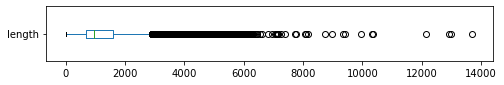

In [8]:
data['length'].plot(kind='box', vert=False, figsize=(8, 1))

<AxesSubplot:ylabel='Frequency'>

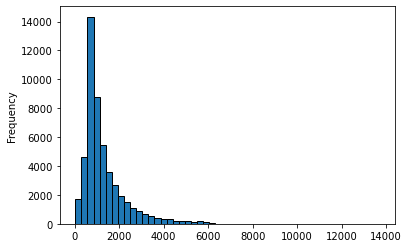

In [9]:
data['length'].plot(kind='hist', bins=50, figsize=(6, 4), edgecolor='k')

### right skewed

In [10]:
data['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

## Cleaning text

In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\66885\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### หา html tag ที่เป็นไปได้ว่าจะมีทั้งหมดใน Text

In [12]:
import re

In [13]:
def find_tag_pattern(text):
    group = set(re.findall(r'<\w+',text))
    final = str(group)
    return final

In [14]:
finding_group = data['review'].apply(find_tag_pattern)

In [15]:
List_tag = []
for i in finding_group:
    List_tag.append(str(i))

In [16]:
List_tag = set(List_tag)

In [17]:
List_tag

{'set()',
 "{'<3'}",
 "{'<_'}",
 "{'<br', '<3'}",
 "{'<br', '<33'}",
 "{'<br', '<SPOILER'}",
 "{'<br', '<em'}",
 "{'<br', '<grin'}",
 "{'<br', '<p'}",
 "{'<br', '<sigh'}",
 "{'<br', '<sp'}",
 "{'<br'}",
 "{'<http'}",
 "{'<i', '<br'}",
 "{'<i', '<hr'}"}

### พบว่ามี Tag ทั้งหมดอยู่ที่ 7 tags ประกอบไปด้วย <br <i <p <em <hr <http <sp
### ส่วนที่เหลือจะเป็นอักขระพิเศษที่ประกอบไปด้วยคำในการ Review

### สำรวจคำใน tag

In [18]:
data[data['review'].str.contains('<grin')]

,review,sentiment,length
3871,I'm a sucker for a decent superhero movie. (I'...,positive,918
32924,<br /><br />Once I ignored some of the implaus...,negative,1661


In [19]:
data['review'][3871]

"I'm a sucker for a decent superhero movie. (I'm not counting super bug budget, no storyline Batman's either)<br /><br />A couple of my favorites are The Phantom and a budget movie called The Demolitionist. The Black Scorpion can be added to that collection.<br /><br />If you've seen the Demolitionist then get this movie. It's basically a copy of that heroine. (It even stars the same guy in both movies)<br /><br />If you haven't, then let me explain...a cop's father is murdered and she seeks vengeance. She laces up the black outfit (a sexy catwomanish, skimpy outfit that looks absolutely great on Joan Severance) and goes out to kick some booty.<br /><br />It's a fun, action packed movie, mind you, you may not wish the kids to see it...without screening it first to see if you approve of the pretty graphic sex scene Severance has in it. Which in my opinion, was a bonus (alright, give it an extra star <grin>)"

In [20]:
sentence = data['review'][3871].lower()
sentence

"i'm a sucker for a decent superhero movie. (i'm not counting super bug budget, no storyline batman's either)<br /><br />a couple of my favorites are the phantom and a budget movie called the demolitionist. the black scorpion can be added to that collection.<br /><br />if you've seen the demolitionist then get this movie. it's basically a copy of that heroine. (it even stars the same guy in both movies)<br /><br />if you haven't, then let me explain...a cop's father is murdered and she seeks vengeance. she laces up the black outfit (a sexy catwomanish, skimpy outfit that looks absolutely great on joan severance) and goes out to kick some booty.<br /><br />it's a fun, action packed movie, mind you, you may not wish the kids to see it...without screening it first to see if you approve of the pretty graphic sex scene severance has in it. which in my opinion, was a bonus (alright, give it an extra star <grin>)"

In [21]:
data[data['review'].str.contains('<em')]

,review,sentiment,length
46067,An occasionally surrealistic thriller that wil...,positive,1818


In [22]:
data['review'][46067]

"An occasionally surrealistic thriller that will push most people's buttons., the 4th Man is sure to offend anyone with a taste for the politically correct. The story's protagonist is a bisexual alcoholic Catholic writer, Gerard (Krabbe), with a seriously twisted sense of imagination. Verhoeven offers up<br /><br />Gerard has an example of everything wrong with the modern man. He's shiftless, delusional, unable to control his urges, afraid to commit to<br /><br />meaningful relationships, and utterly apathetic about life in general. As the character himself states at one point, he is a professional liar, unable to recall the truth.<br /><br />The movie opens with Gerard dreaming of spiders consuming Christ, and then waking to begin the long march to his own destruction. He chases off<br /><br />one man (a boyfriend presumably), then chases another at a train station. Later, at a lecture, he meets a woman who seems to want to help him, or<br /><br />perhaps she has more nefarious plans.

In [23]:
data[data['review'].str.contains('<sp')]

,review,sentiment,length
33637,"> Contrary to most reviews I've read, I didn't...",positive,965


In [24]:
data['review'][33637]

'> Contrary to most reviews I\'ve read, I didn\'t feel this followed any of the other rock movies ("Spinal Tap", etc.) The story was more unique, although I feel most people wanted to see the "sex, drugs & rock and roll" vices that the band kept alluding to.<br /><br />> As an American, I knew a few of the actors - Spall, Connelly & Rea. Surprised to find out "Brian"/Bruce Robinson was in Zifferedi\'s (<sp?) classic "Romeo & Juliet". Guess I\'ll have to rent that next.<br /><br />> "THE FLAME STILL BURNS" - My wife, who hails from Mexico, didn\'t follow the English/British language too well, missed some of the jokes (which I dutifully explained) but she cried her eyes out at the concert scene. She loves the song so much now.<br /><br />> Funny that Amazon.com has the soundtrack for $30+usd when I bought the DVD in the bargain bin at Wal-Mart for $5.50usd. Price non-withstanding, I first saw this on late night cable and have been dying to find it ever since.'

In [25]:
data[data['review'].str.contains('<3')]

,review,sentiment,length
11691,I loved this movie and i never knew it was thi...,positive,859
12854,i love this TV series so much. it contains ani...,positive,1021
22402,This movie is an evolutionary piece - from Ter...,positive,1331
43339,"Yeah, I know my title sucks. I couldn't think ...",positive,866


In [26]:
data['review'][43339]

"Yeah, I know my title sucks. I couldn't think of any other title. x] Ice is a brilliant first season episode. Very interesting idea and good acting as well. The whole worm-looking-thing was really creepy in my opinion. I've never been a fan of insects, so all the insect episodes are creepy to me. x] Anyway, lets go on to the good and bad things about this episode,<br /><br />The Good: The parasite thing. Awesome!<br /><br />Scully finally trusting Mulder. Awww... <33<br /><br />It was a good idea to put another parasite in the ear. Though if someone told me they had to put that thing in my ear... I think the whole cabin would be dead.<br /><br />The Bad: How did the dog stay alive for so long?<br /><br />How didn't Huffman get those black spots? Or maybe she did, but no-one saw it...<br /><br />Conclusion: Very good episode, especially for Season 1. 8/10"

In [27]:
data[data['review'].str.contains('<http')]

,review,sentiment,length
27884,Remember the chain-smoking channeler exposed o...,negative,886


In [28]:
data['review'][27884]

'Remember the chain-smoking channeler exposed on 60 Minutes a few years ago? This is her. Lots of folks reviewed this movie without checking the bona fides of the filmmakers. The producers have been using phony "word of mouth" promotions very successfully without disclosing the financial and philosophical underpinnings for this piece of marketing tripe. If you believe in channeling, reincarnation, new age dreck and day-old baloney, this film is for you. If you want a discussion of quantum physics or reality, look elsewhere. The purpose of this movie is to convince you that Ramtha isn\'t a wacko, so you\'ll give her a bunch of your money. If you can tiptoe through the Ramtha website without howling in disbelief, then maybe you\'ll think the bucks you dropped on this infomercial for insanity was well spent. <http://rogerebert.suntimes.com/apps/pbcs.dll/section?category=ANSWERMAN>'

### พบ Tag และสัญลักษณ์ที่ให้รีวิวประกอบรวมด้วยกันทั้งหมด

In [29]:
http_tag = re.compile(r'<http')
br_tag = re.compile(r'<br')
i_tag = re.compile(r'<i')
hr_tag = re.compile(r'<hr')
love_symbol = re.compile(r'<3')
p_tag = re.compile(r'<p')
em_tag = re.compile('<em')
#### Possibility tag remove

In [30]:
tags = [http_tag, br_tag, i_tag, hr_tag, love_symbol, p_tag, em_tag]

### Cleaning function 
1.ปรับตัวอักษรเป็นตัวพิมพ์เล็กทั้งหมด

2.ลบ Tag ที่เป็นไปได้ทั้งหมด

3.ลบตัวอักขระพิเศษทั้งหมด

4.ลบคำ stopwords ในตัว reivew

5.ลบตัวเลขในตัว review

In [31]:
replace_symbols = re.compile('[/(){}\[\]\|@,;]')
bad_symbols = re.compile('[^0-9a-z #+_]')
stop_words = set(stopwords.words('english'))

def cleaning_text(text):
    
    text = text.lower()
    #Remove tag
    for tag in tags:
        text = tag.sub('',text)
    text = replace_symbols.sub(' ',text)
    text = bad_symbols.sub('',text)
    text = ' '.join(word for word in text.split() if word not in stop_words) # remove stopwords
    return text  

In [32]:
data['review'] = data['review'].apply(cleaning_text)
data['review'] = data['review'].str.replace('\d+','')

<ipython-input-32-583b97bf1e5c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['review'] = data['review'].str.replace('\d+','')


In [53]:
data['review'][33637]

'contrary reviews ive read didnt feel followed rock movies spinal tap etc story unique although feel people wanted see sex drugs rock roll vices band kept alluding american knew actors spall connelly rea surprised find brian bruce robinson zifferedis sp classic romeo juliet guess ill rent next flame still burns wife hails mexico didnt follow english british language well missed jokes dutifully explained cried eyes concert scene loves song much funny amazoncom soundtrack +usd bought dvd bargain bin walmart usd price nonwithstanding first saw late night cable dying find ever since'

## Processing Model

In [34]:
from keras.preprocessing.text import Tokenizer
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 2000
# Max number of words in each reivew.
MAX_SEQUENCE_LENGTH = 500
# This is fixed.
EMBEDDING_DIM = 300

tokenizer = Tokenizer(num_words=MAX_NB_WORDS) #Clean text เรียบร้อยแล้ว
tokenizer.fit_on_texts(data['review'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 148747 unique tokens.


## Pad sequence

In [35]:
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(data['review'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (50000, 500)


pad sequnce เพื่อให้ตัวที่ไม่มีค่าให้เป็น Max_sequence length

In [36]:
data['review'][0]

'one reviewers mentioned watching  oz episode youll hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle class inma

In [37]:
#X = X[0:50]

In [38]:
labels = pd.get_dummies(data['sentiment']).columns.values
labels

array(['negative', 'positive'], dtype=object)

In [39]:
Y = pd.get_dummies(data['sentiment']).values
print('shape of label tensor:',Y.shape)

shape of label tensor: (50000, 2)


In [40]:
#Y = Y[0:50]

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(35000, 500) (35000, 2)
(15000, 500) (15000, 2)


## Using Model LSTM 

In [42]:
import os
from keras.models import load_model
if os.path.exists('model_lstm.h5'):
    model = load_model('model_lstm.h5')

In [43]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from keras.callbacks import EarlyStopping

model = Sequential() #ลำดับ ในการ add layer
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', 
                                             patience=3, 
                                             min_delta=0.0001)])

Epoch 1/5
493/493 [==============================] - 917s 2s/step - loss: 0.4109 - accuracy: 0.8191 - val_loss: 0.3114 - val_accuracy: 0.8683
Epoch 2/5
493/493 [==============================] - 1061s 2s/step - loss: 0.2914 - accuracy: 0.8821 - val_loss: 0.3137 - val_accuracy: 0.8709
Epoch 3/5
493/493 [==============================] - 1070s 2s/step - loss: 0.2653 - accuracy: 0.8937 - val_loss: 0.3101 - val_accuracy: 0.8743
Epoch 4/5
493/493 [==============================] - 1069s 2s/step - loss: 0.2434 - accuracy: 0.9017 - val_loss: 0.3572 - val_accuracy: 0.8629
Epoch 5/5
493/493 [==============================] - 1080s 2s/step - loss: 0.2306 - accuracy: 0.9064 - val_loss: 0.3302 - val_accuracy: 0.8674


In [44]:
from keras.models import load_model

model.save('model_lstm.h5')

# Evaluation

In [45]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n\tLoss: {:0.3f}\n\tAccuracy: {:0.3f}'\
      .format(accr[0],accr[1]))

469/469 [==============================] - 61s 129ms/step - loss: 0.3165 - accuracy: 0.8699
Test set
	Loss: 0.317
	Accuracy: 0.870


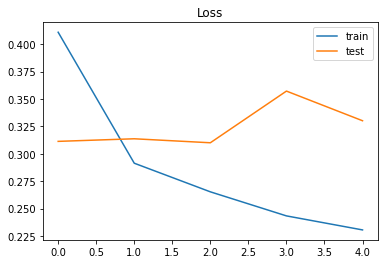

In [46]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

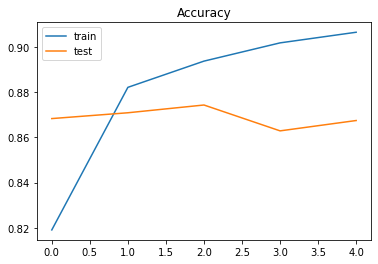

In [47]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [48]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

pd.DataFrame(confusion_matrix(Y_test.argmax(axis=1), 
                              y_pred.argmax(axis=1)),
             index=labels, columns=labels)

,negative,positive
negative,6638,773
positive,1178,6411


In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_true=Y_test.argmax(axis=1), 
                            y_pred=y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      7411
           1       0.89      0.84      0.87      7589

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



## Test predicted

In [58]:
import numpy as np
review_sentiment = [data['review'][49500]]
seq = tokenizer.texts_to_sequences(review_sentiment)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = pd.get_dummies(data['sentiment']).columns.values
print(pred, labels[np.argmax(pred)])

[[0.92915577 0.06989658]] negative


In [59]:
data.iloc[49500]

review       case bunch people thinking clever story fits t...
sentiment                                             negative
length                                                    1363
Name: 49500, dtype: object

In [63]:
negative_review_text = 'I watch movies constantly, an i rarely see movies that i have troubles watching all the way through. For one of my classes at school, i needed to watch afi’s top 10 movies. This movie was ranked at number one and I have no idea why. This movie was so boring I had to watch it several times because i kept falling asleep and missing certain parts. Fine, it was clever having Rosebud, and the importance of youth, but i felt that this is an example of a movie, that could be told in about 5 minutes, rather than stretching it out into one of the longest and most boring movies that i have ever seen. Now, i was also shocked at the acting. i generally find that acting supports a relatively weak script, however in this movie’s case, i felt that the relatively weak script was supporting the awful acting. i personally was not very impressed with the acting strictly because the reactions felt very forced and everything was very overdone. all in all i was not impressed at all with this film, regardless of past ratings.'

In [64]:
import numpy as np
review_sentiment = [negative_review_text]
seq = tokenizer.texts_to_sequences(review_sentiment)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = pd.get_dummies(data['sentiment']).columns.values
print(pred, labels[np.argmax(pred)])

[[0.98039705 0.01662549]] negative
